# Trivago case study


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


DATA = '../TrivagoCaseStudy/data/'

First step we need to take after importing libraries is converting(reading) a comma-separated values (csv) file into DataFrame. First dataset contains metrics for February and second dataset contains metrics for May.

In [140]:
test_february = pd.read_csv(DATA + 'test1.csv')
test_may = pd.read_csv(DATA + 'test2.csv')


In [141]:
test_february.head()


,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05


In [142]:
test_may.head()


,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-05-01,US,test,18978,16560,22868.156215,1400,3.079888e+05
1,2019-05-01,US,control,188086,169373,208131.939979,13558,2.780706e+06
2,2019-05-01,DE,test,8441,7358,5214.547510,348,6.683872e+04
3,2019-05-01,DE,control,90793,81661,55249.407028,3185,6.243513e+05
4,2019-05-01,UK,test,10907,9557,8853.686349,403,8.820581e+04


In [143]:
print(set(test_february['platform']))
print(set(test_may['platform']))
print(set(test_february['group']))
print(set(test_may['group']))


{'AU', 'UK', 'BR', 'US', 'JP', 'DE'}
{'AU', 'UK', 'BR', 'US', 'JP', 'DE'}
{'control', 'test'}
{'control', 'test'}


After taking a quick look on the data, we can see that we have 6 unique platforms(countries), and two groups(control and test). Each day in month contains data for each platform and both groups(12 rows for each day). Before we proceed with data analysis, we need to do some feature engineering. Since we will need to analyse metrics in different periods of time, it will be usefull to create a separate columns for day, month and year in datasets. Also, since control group data has been shown to the majority of the users(about 90%), we will need to create a variable/column which will represents conversion rate for test and control set of data.
Generally, conversion rate is the number of conversions divided by the total number of visitors, and it allows us to measure the performance of our web pages and apps. In this case I've decided to divide number of bookings by the number of clicks, because clicks are redirecting users to the websites of advertisers. After that, I converted it into percents, in order to be easier to read.
Also, I've added a revenue_per_click column, and removed ymd, year and month columns after I've checked if it has same values... 


In [157]:
def feature_engineering(df):
     
     df['year'] = pd.DatetimeIndex(df['ymd']).year
     df['day'] = pd.DatetimeIndex(df['ymd']).day
     df['month'] = pd.DatetimeIndex(df['ymd']).month
     
     df['booking_amount'] = df['booking_amount'].astype(int)
     df['revenue_per_click'] = (df['revenue']/df['clicks'])
     df['conversion_rate(%)'] = df['bookings']/df['clicks'] * 100
     df.drop(columns=['ymd', 'month', 'year'], inplace=True)
     
     return df   

We will call function for feature engineering on both sets of data

In [ ]:
feature_engineering(test_february)
feature_engineering(test_may)


It is always a good practice to check if there is a missing data in datasets.

In [159]:
test_february.isnull().sum()

platform              0
group                 0
visits                0
clicks                0
revenue               0
bookings              0
booking_amount        0
day                   0
revenue_per_click     0
conversion_rate(%)    0
dtype: int64

In [160]:
test_may.isnull().sum()

platform              0
group                 0
visits                0
clicks                0
revenue               0
bookings              0
booking_amount        0
day                   0
revenue_per_click     0
conversion_rate(%)    0
dtype: int64

In [195]:
test_february.head()

,platform,group,visits,clicks,revenue,bookings,booking_amount,day,revenue_per_click,conversion_rate(%)
0,US,test,19219,17289,23752.189583,1072,215244,1,1.373832,6.200474
1,US,control,204923,184276,250169.068436,11775,2176644,1,1.357578,6.389872
2,DE,test,14788,13273,10381.106892,492,92056,1,0.782122,3.706773
3,DE,control,106112,95555,72563.524075,3621,771990,1,0.759390,3.789441
4,UK,test,13823,12441,10472.761095,486,100340,1,0.841794,3.906438


In [164]:
test_may.head()

,platform,group,visits,clicks,revenue,bookings,booking_amount,day,revenue_per_click,conversion_rate(%)
0,US,test,18978,16560,22868.156215,1400,307988,1,1.380927,8.454106
1,US,control,188086,169373,208131.939979,13558,2780706,1,1.228838,8.004818
2,DE,test,8441,7358,5214.547510,348,66838,1,0.708691,4.729546
3,DE,control,90793,81661,55249.407028,3185,624351,1,0.676570,3.900271
4,UK,test,10907,9557,8853.686349,403,88205,1,0.926409,4.216804


# Task 1- Data Exploration 

### Which platform is most valuable platform for Trivago? Why?

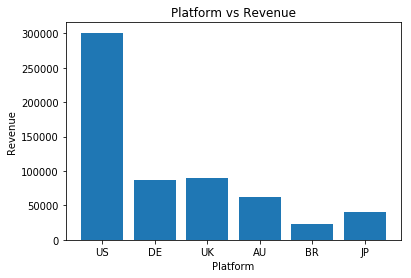

In [165]:
def visualize_data(title, xlabel, ylabel, x, y, df):
    plt.bar(df[x], df[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
visualize_data('Platform vs Revenue in February', 
               'Platform', 'Revenue', 
               'platform', 
               'revenue', test_february)


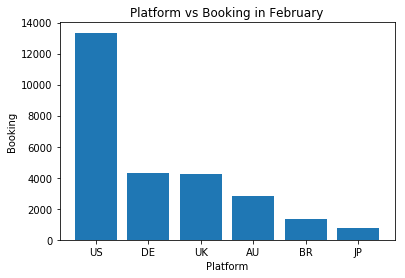

In [167]:
visualize_data('Platform vs Booking in February', 
               'Platform', 'Booking', 
               'platform', 
               'bookings', test_february)


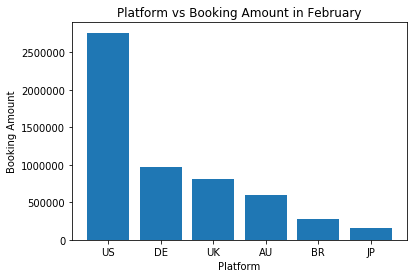

In [171]:
visualize_data('Platform vs Booking Amount in February', 
               'Platform', 'Booking Amount', 
               'platform', 
               'booking_amount', test_february)


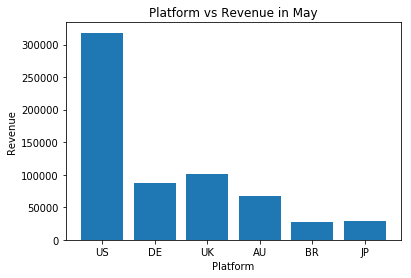

In [178]:
visualize_data('Platform vs Revenue in May', 
               'Platform', 'Revenue', 
               'platform', 
               'revenue', test_may)


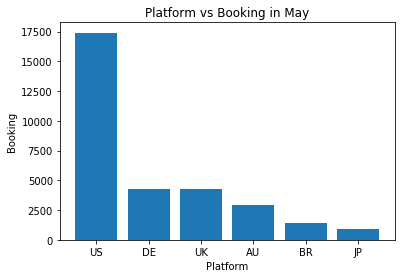

In [177]:
visualize_data('Platform vs Booking in May', 
               'Platform', 'Booking', 
               'platform', 
               'bookings', test_may)


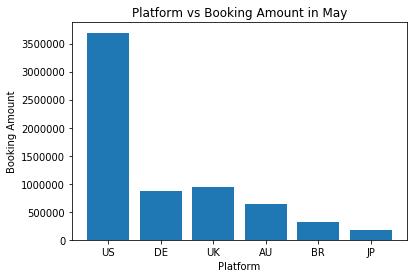

In [187]:
visualize_data('Platform vs Booking Amount in May', 
               'Platform', 'Booking Amount', 
               'platform', 
               'booking_amount', test_may)


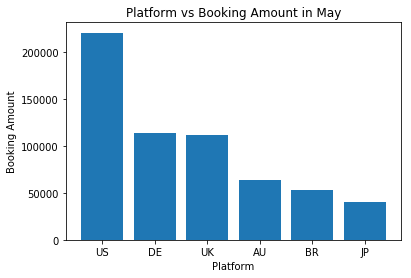

In [220]:
visualize_data('Platform vs Booking Amount in May', 
               'Platform', 'Booking Amount', 
               'platform', 
               'clicks', test_may)


##### Conversion rate vs platforms for february(test group)

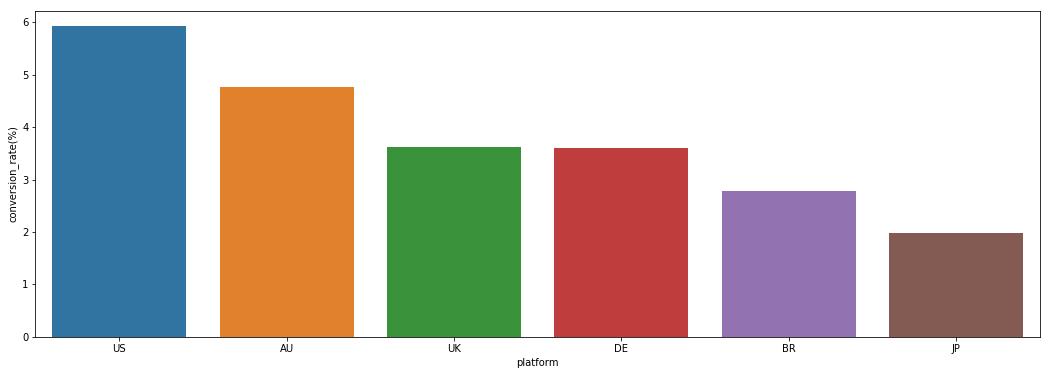

In [225]:
groupby_country = test_february[test_february['group'] == 'test'][['conversion_rate(%)', 'platform']].groupby('platform').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion_rate(%)', ascending = False )

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', data=groupby_country, ax=ax)
plt.show()



##### Conversion rate vs platforms for may(test group)

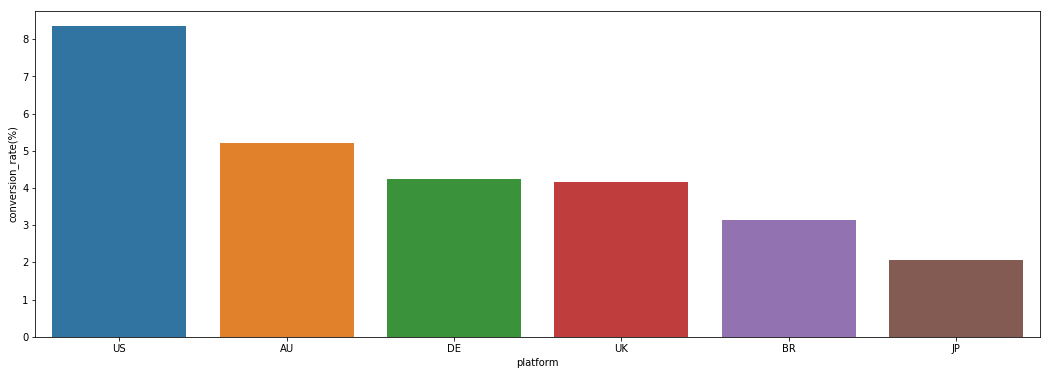

In [226]:
groupby_country = test_may[test_may['group'] == 'test'][['conversion_rate(%)', 'platform']].groupby('platform').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion_rate(%)', ascending = False )

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', data=groupby_country, ax=ax)
plt.show()


##### Conversion rate vs platforms for may(control group)

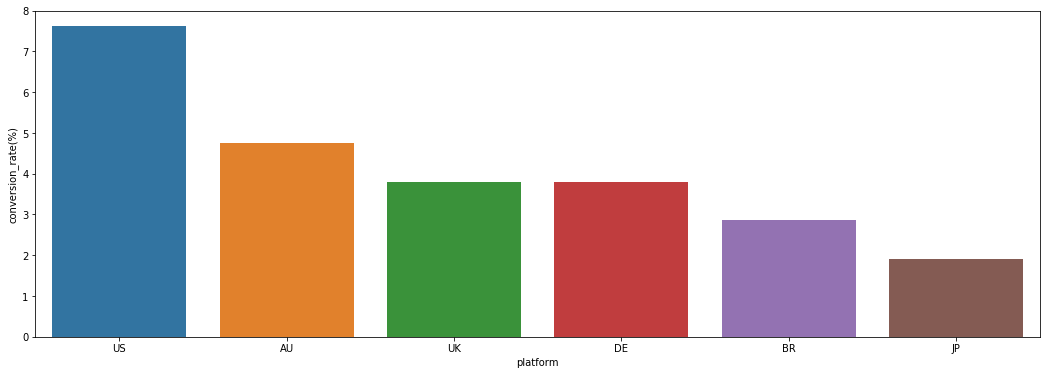

In [228]:
groupby_country = test_may[test_may['group'] == 'control'][['conversion_rate(%)', 'platform']].groupby('platform').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion_rate(%)', ascending = False )

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', data=groupby_country, ax=ax)
plt.show()

##### Conversion rate vs platforms for february(control group)

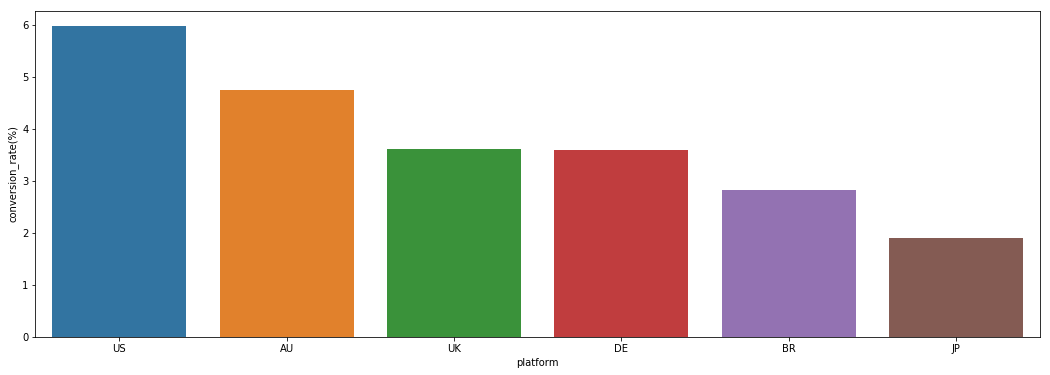

In [229]:
groupby_country = test_february[test_february['group'] == 'control'][['conversion_rate(%)', 'platform']].groupby('platform').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion_rate(%)', ascending = False )

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', data=groupby_country, ax=ax)
plt.show()


As expected, US platform is the most valuable platform for Trivago since it has largest number of bookings, largest revenue, highest booking amounts, and highest conversion rate for both datasets and both groups...

### What are the global and platform average revenue per click?

In [235]:
def global_revenue(df):
    result = df['revenue_per_click'].mean()
    print('Global revenue per click is {}'.format(result))
    
def calculate_revenue_per_platform(df):
    for platform in list(df['platform'].unique()):
        revenue = df.loc[df['platform'] == platform]['revenue_per_click'].mean()
        print('Revenue per click on {} platform is {}'.format(platform, revenue))    
    
    

#### Global revenue per click for February

In [236]:
global_revenue(test_february)

Global revenue per click is 0.824068094424757


#### Global revenue per click for May

In [237]:
global_revenue(test_may)

Global revenue per click is 0.8352169516988116


####  Revenue per click  per platform for February

In [197]:
calculate_revenue_per_platform(test_february)

Revenue per click on US platform is 1.2822347072925477
Revenue per click on DE platform is 0.6776602209675545
Revenue per click on UK platform is 0.8034715244106218
Revenue per click on AU platform is 0.9953726894824777
Revenue per click on BR platform is 0.4005649797151876
Revenue per click on JP platform is 0.785104444680152


####  Revenue per click  per platform for May


In [204]:
calculate_revenue_per_platform(test_may)

Revenue per click on US platform is 1.3074088719252797
Revenue per click on DE platform is 0.703926799171062
Revenue per click on UK platform is 0.8025945457714159
Revenue per click on AU platform is 0.9934394190173078
Revenue per click on BR platform is 0.4208551254619807
Revenue per click on JP platform is 0.7830769488458222


### Do you find any trend in the data?

#### Platform vs coversion rate on February for both groups


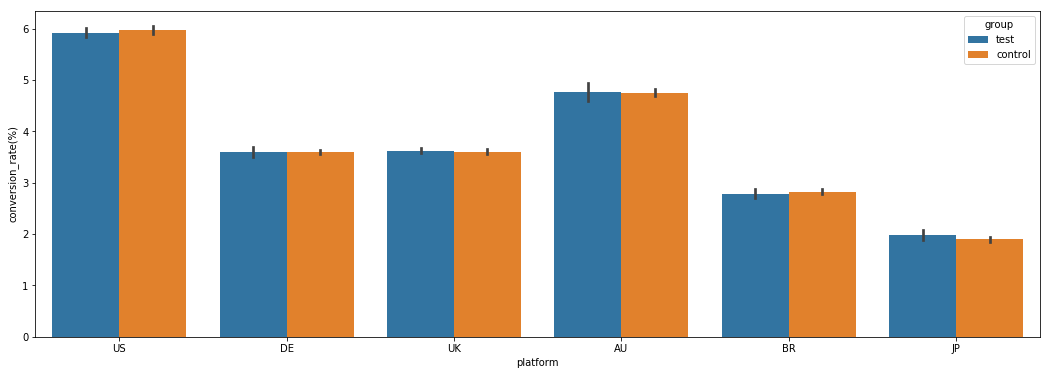

In [238]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', hue='group', data=test_february, ax=ax)
plt.show()


#### Platform vs coversion rate on May for both groups


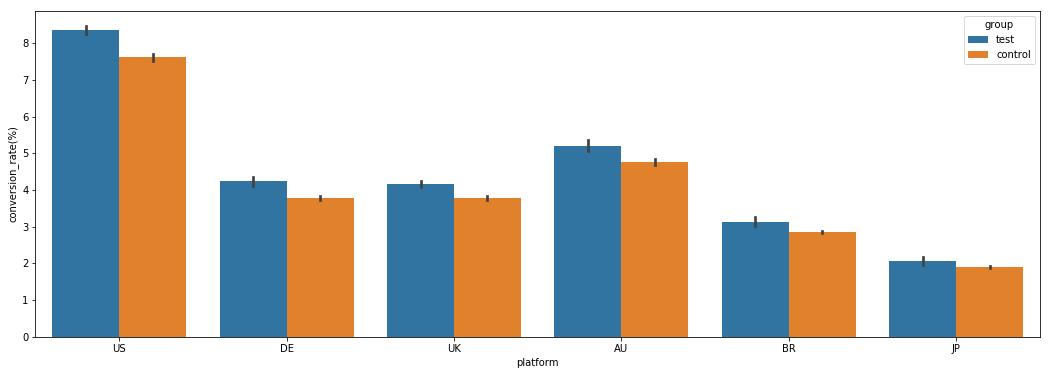

In [239]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='platform', y='conversion_rate(%)', hue='group', data=test_may, ax=ax)
plt.show()


From this bars we can conlude that feature from February is giving better conversion rate for test group only on JP platform, but on other platforms it looks like it's not performing better. Otherwise, feature from May is giving better conversion rates for test group on all platforms...

##### Day vs bookings in February for control group

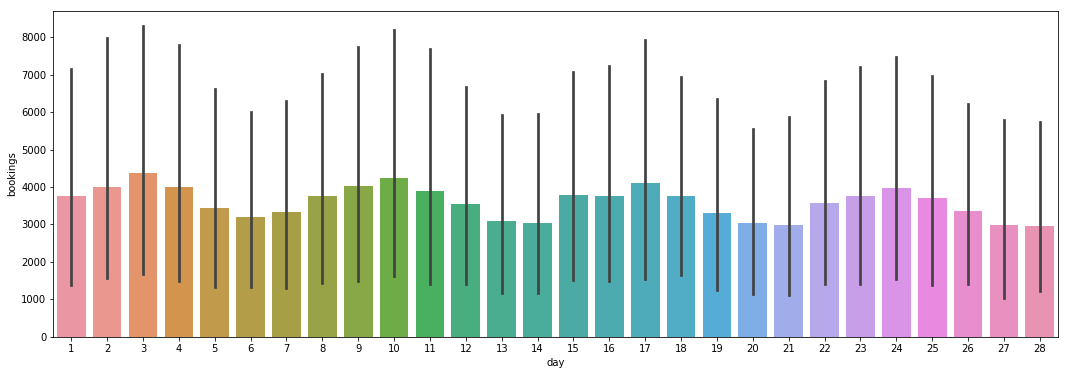

In [257]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='bookings', data=test_february[test_february['group'] == 'control'], ax=ax)
plt.show()


##### Day vs bookings in February for test group

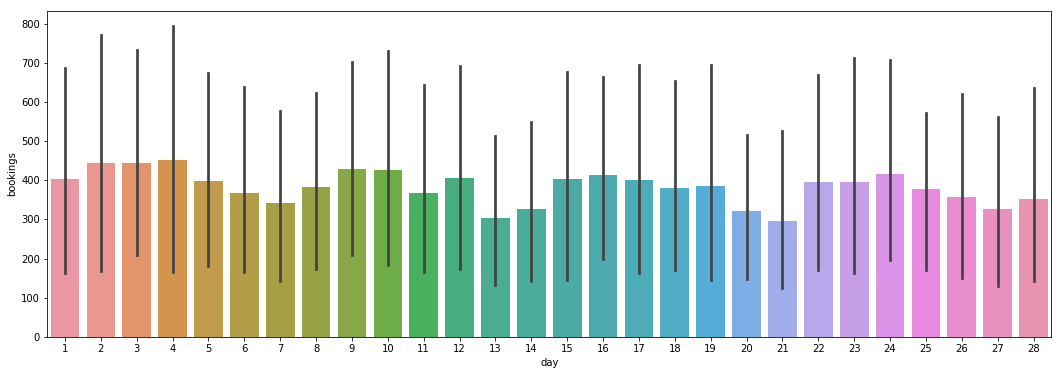

In [276]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='bookings', data=test_february[test_february['group'] == 'test'], ax=ax)
plt.show()


Since February 1st 2019 was Friday, we can see that number of bookings is increasing from Wednesday to Sunday and decreasing from Sunday to Wednesday for control group. For test group in February trend is similar, except that it can be noticed higher number of bookings on Tuesday, two days before Valentine's day...

##### Day vs bookings in May for control group


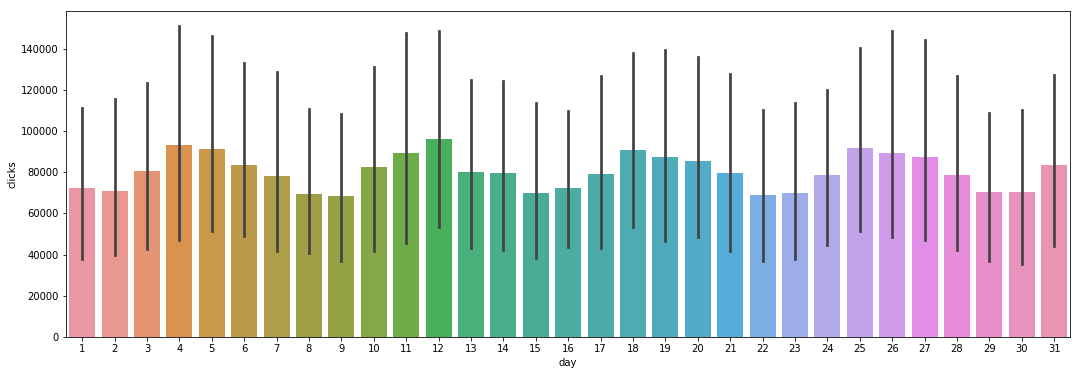

In [256]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='bookings', data=test_may[test_may['group'] == 'control'], ax=ax)
plt.show()


##### Day vs bookings in May for test group


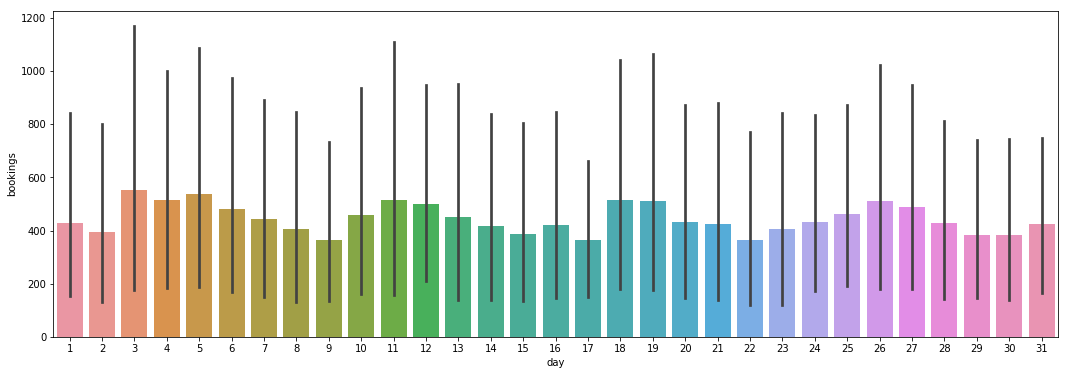

In [281]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='bookings', data=test_may[test_may['group'] == 'test'], ax=ax)
plt.show()


Since May 1st 2019 was Wednesday, we can also seen that number of bookings is increasing from Wednesday to Sunday and decreasing from Sunday to Wednesday with little iregularities in trends. For example, we can see higher number of bookings for test group at Friday - May 3rd, than on weekend after it. We can assume that in test group for May, a lot of customers wanted to travel right after Labor day... 

##### Day vs clicks in May for test group


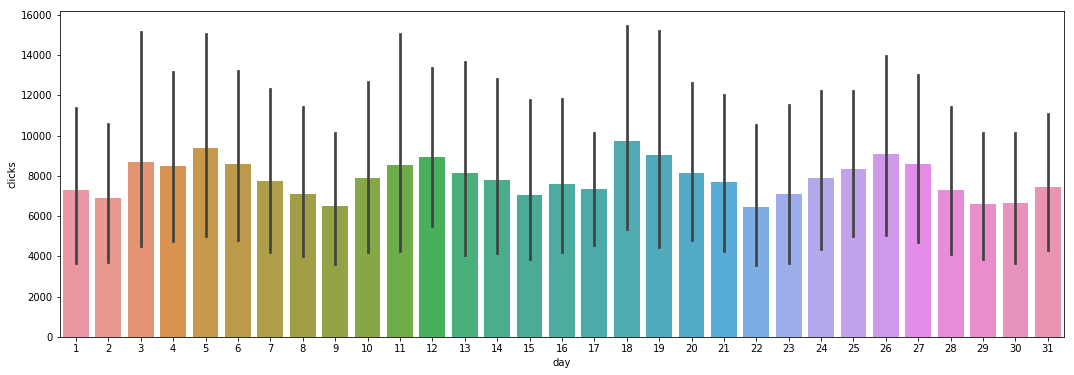

In [260]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='clicks', data=test_may[test_may['group'] == 'test'], ax=ax)
plt.show()


##### Day vs clicks in May for control group


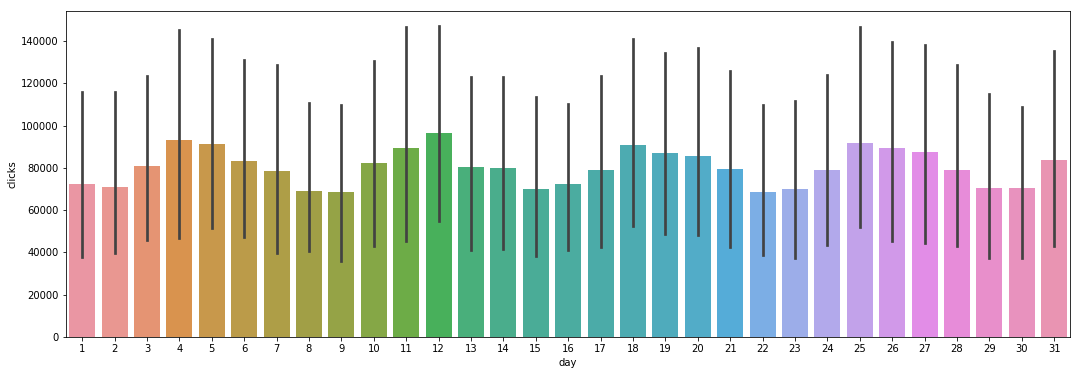

In [262]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='clicks', data=test_may[test_may['group'] == 'control'], ax=ax)
plt.show()


##### Day vs clicks in February for test group


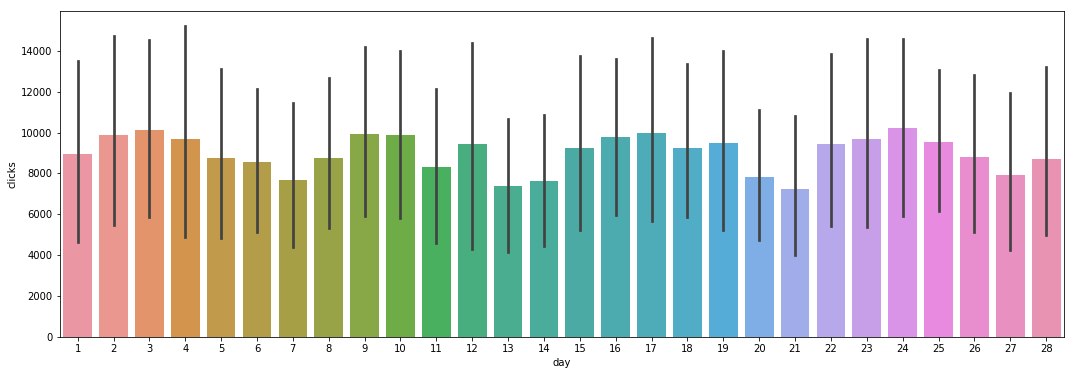

In [273]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='clicks', data=test_february[test_february['group'] == 'test'], ax=ax)
plt.show()


##### Day vs clicks in February for control group


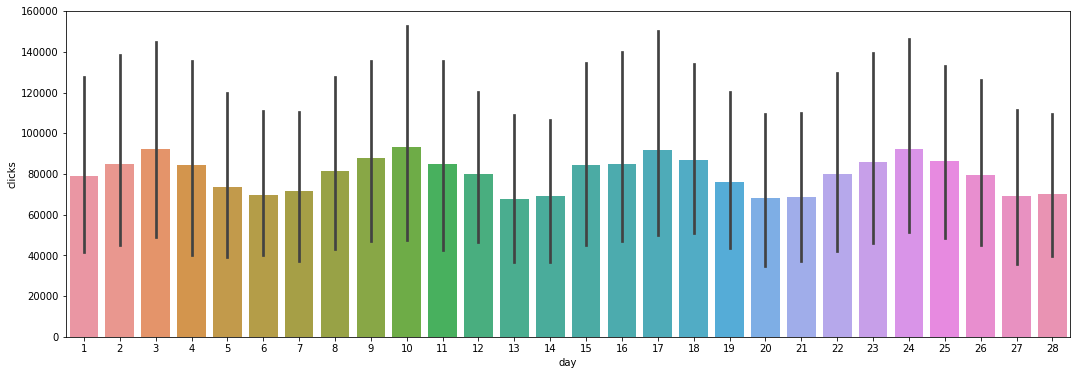

In [282]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='day', y='clicks', data=test_february[test_february['group'] == 'control'], ax=ax)
plt.show()


We can notice similar trends for clicks on both groups and both datasets. General conclusion is that number of bookings/clicks is increasing from Wednesday to Sunday and decreasing from Sunday to Wednesday. Also, we can see little bit more irregularities in that trend in test group for February than in control group for that month.

#### Which relation do you think exists between clicks and bookings? And what about visits and bookings? Which one would you consider as more valuable KPI? 

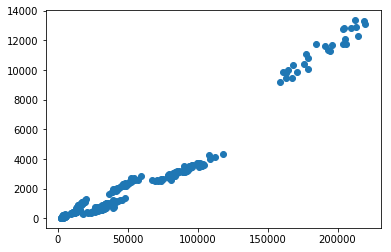

In [267]:
plt.scatter(test_february['clicks'], test_february['bookings'])

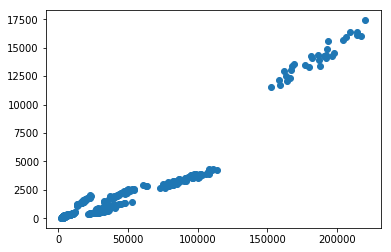

In [268]:
plt.scatter(test_may['clicks'], test_may['bookings'])

In [285]:
test_february['clicks'].corr(test_february['bookings'])

0.9694600474754409

In [286]:
test_may['visits'].corr(test_may['bookings'])

0.9475661121534811

We can see strong linear relationship between these two pairs of variables, except correlation between clicks and bookings is more linear. Since Trivago platform is working on CPC model, and clicks are actually necessary for redirecting users on advertisers websites and bookings on it, I consider relation between bookings and clicks  more valuable KPI. That's also the reason I've created column coversion rate as relation between bookings and clicks in both datasets.

In [306]:
# A/B test for february
test_value_february = test_february[test_february['group'] == 'test']['conversion_rate(%)'].values
control_value_february = test_february[test_february['group'] == 'control']['conversion_rate(%)'].values
# Welch Two Sample t-test
print(ttest_ind(test_value, control_value, equal_var=False))

Ttest_indResult(statistic=0.013994737805543483, pvalue=0.9888425349724197)


In [302]:
# A/B test for may
test_value_may = test_may[test_may['group'] == 'test']['conversion_rate(%)'].values
control_value_may = test_may[test_may['group'] == 'control']['conversion_rate(%)'].values
# Welch Two Sample t-test
print(ttest_ind(test_value, control_value, equal_var=False))

Ttest_indResult(statistic=0.013994737805543483, pvalue=0.9888425349724197)


In [303]:
def eval_test(test_results,control_results):
    test_result = ttest_ind(test_results, control_results)
    if test_result[1] < 0.05:
        print('result is significant')
    else:
        print('result is not significant')

In [304]:
eval_test(test_value, control_value)

result is not significant


In [305]:
eval_test(test_value_may, control_value_may)

result is significant
